# **本文将从简单到容易，通过🌰解释常用的正则表达式的用法。全文分为以下几部分：**
0. python库函数
1. 匹配单个字符 
2. 匹配多个字符
3. 元字符
4. 重复字符串匹配
5. 位置匹配
6. 使用子表达式
7. 使用回溯
8. 前后查找
9. 嵌入条件

# 0. python库函数

常用的正则表达式包是re，其中使用最多的几个函数为：

re.match 
尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，match()就返回none。

re.search 
扫描整个字符串并返回第一个成功的匹配。

re.findall
在字符串中找到正则表达式所匹配的所有子串，并返回一个列表，如果没有找到匹配的，则返回空列表。

本文将使用其中的函数，简单封装成一个便于输出的接口调用

In [50]:
import re#python常用的正则表达式包
def get_res(regex,text):
    res=re.findall(regex,text)
    print('findall res:',res)
    res=re.search(regex,text)
    print('search res:',res)


# 1.匹配单个字符



## example 1: 单个字符

In [51]:
text="Hello, my name is Van. Please visit my website at https://www.zhihu.com/people/le-yifan-35."

In [52]:
get_res(r'Van',text)

findall res: ['Van']
search res: <re.Match object; span=(18, 21), match='Van'>


## example 2:匹配任何字符

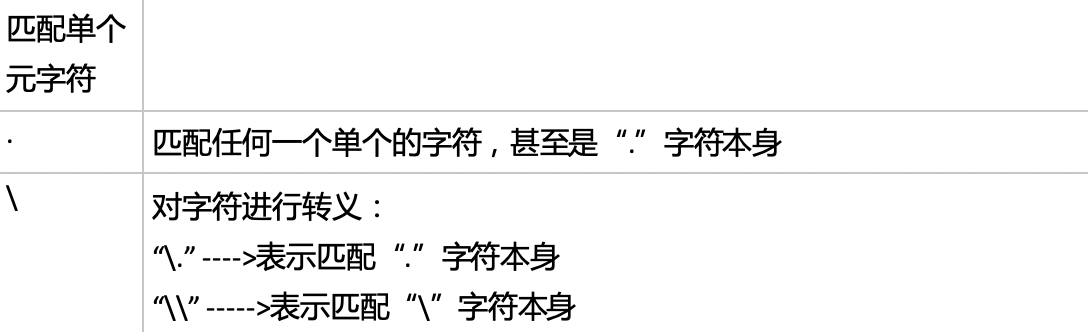

In [53]:
text="sales1.xls\
orders3.xls\
sales2.xls\
sales3.xls\
apac1.xls\
europe2.xls"

In [54]:
get_res(r'sales.',text)

findall res: ['sales1', 'sales2', 'sales3']
search res: <re.Match object; span=(0, 6), match='sales1'>


# 2. 匹配多个字符

## example 1:匹配多个字符

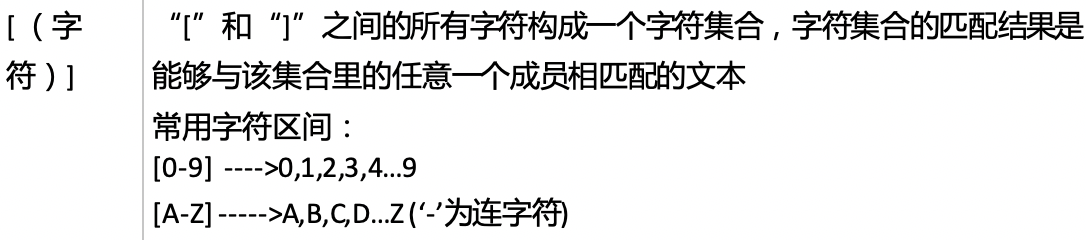

In [55]:
text="sales1.xls\
orders3.xls\
sales2.xls\
sales3.xls\
apac1.xls\
europe2.xls\
na1.xls\
na2.xls\
sa1.xls\
ca1.xls"

In [56]:
get_res(r'[ns]a.\.xls',text)

findall res: ['na1.xls', 'na2.xls', 'sa1.xls']
search res: <re.Match object; span=(61, 68), match='na1.xls'>


## example 2：匹配多个字符

In [57]:
text="The phrase “regular expression” is often abbreviated as RegEx or regex."

In [58]:
get_res(r'[Rr]eg[Ee]x',text)

findall res: ['RegEx', 'regex']
search res: <re.Match object; span=(56, 61), match='RegEx'>


## example 3：设定字符的范围

In [59]:
text="sales1.xls\
orders3.xls\
sales2.xls\
sales3.xls\
apac1.xls\
europe2.xls\
na1.xls\
na2.xls\
sa1.xls\
ca1.xls"

get_res(r'[ns]a[0123456789]\.xls',text)

get_res(r'[ns]a[0-9]\.xls',text)

findall res: ['na1.xls', 'na2.xls', 'sa1.xls']
search res: <re.Match object; span=(61, 68), match='na1.xls'>
findall res: ['na1.xls', 'na2.xls', 'sa1.xls']
search res: <re.Match object; span=(61, 68), match='na1.xls'>


## example 4：设定字符的范围

In [60]:
text="<BODY BGCOLOR=”#336633” TEXT=”#FFFFFF” MARGINWIDTH=”0” MARGINHEIGHT=”0” TOPMARGIN=”0” LEFTMARGIN=”0”>"

get_res(r'[0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f][0-9A-Fa-f]',text)


findall res: ['336633', 'FFFFFF']
search res: <re.Match object; span=(16, 22), match='336633'>


## example 5:取非匹配

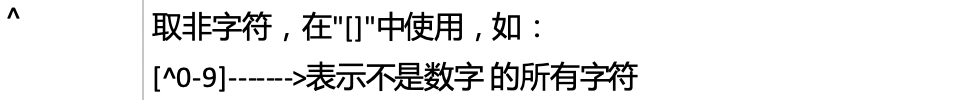

In [61]:
text="sales1.xls\
orders3.xls\
sales2.xls\
sales3.xls\
apac1.xls\
europe2.xls\
sam.xls\
na1.xls\
na2.xls\
sa1.xls\
ca1.xls"

get_res(r'[ns]a[^0-9]\.xls',text)



findall res: ['sam.xls']
search res: <re.Match object; span=(61, 68), match='sam.xls'>


# 3. 元字符

### 元字符指的是这个字符有特殊的含义，而不是字符本身的含义


## example 1:元字符'[]'

In [62]:
text="var myArray = new Array();\
...\
if (myArray[0] == 0) {\
...\
}"
get_res(r'myArray[0]',text)

get_res(r'myArray\[0\]',text)

findall res: []
search res: None
findall res: ['myArray[0]']
search res: <re.Match object; span=(33, 43), match='myArray[0]'>


## example 2:元字符'\\'

In [63]:
text="\ home\  ben\ sales\ "
get_res(r'\\',text)

findall res: ['\\', '\\', '\\', '\\']
search res: <re.Match object; span=(0, 1), match='\\'>


## example 3:空白字符

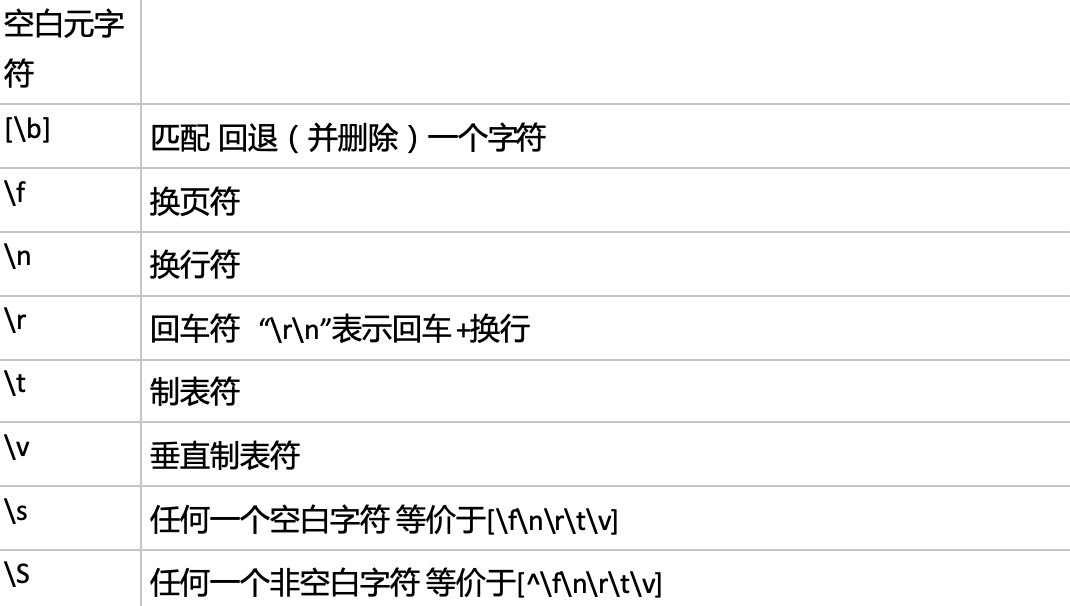

In [64]:
text="“101”,”Ben”,”Forta”\
“102”,”Jim”,”James”\r\n\
\r\n\
“103”,”Roberta”,”Robertson”\
“104”,”Bob”,”Bobson”"
get_res(r'\r\n\r\n',text)

findall res: ['\r\n\r\n']
search res: <re.Match object; span=(38, 42), match='\r\n\r\n'>


## example 4:数字元字符

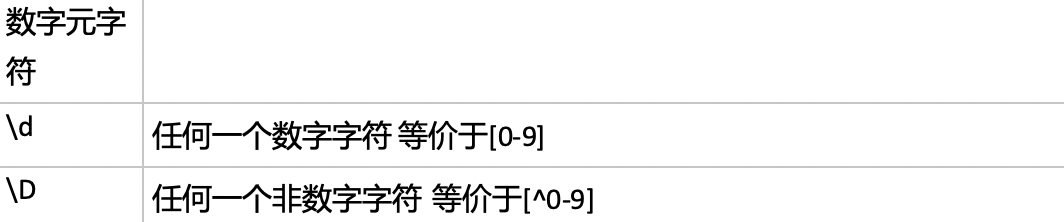

In [65]:
text="var myArray = new Array();\
...\
if (myArray[0] == 0) {\
...\
}"
get_res(r'myArray\[\d\]',text)


findall res: ['myArray[0]']
search res: <re.Match object; span=(33, 43), match='myArray[0]'>


## example 5:字母数字元字符

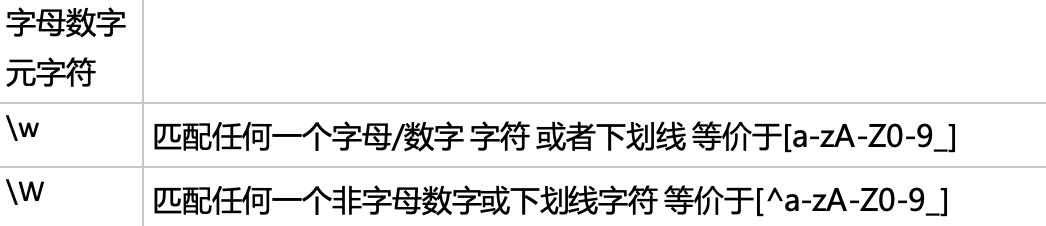

In [66]:
text='11213 \
A1C2E3 \
48075 \
48237 \
M1B4F2 \
90046 \
H1H2H2'
get_res(r'\w\d\w\d\w\d',text)

findall res: ['A1C2E3', 'M1B4F2', 'H1H2H2']
search res: <re.Match object; span=(6, 12), match='A1C2E3'>


# 4. 重复字符串匹配

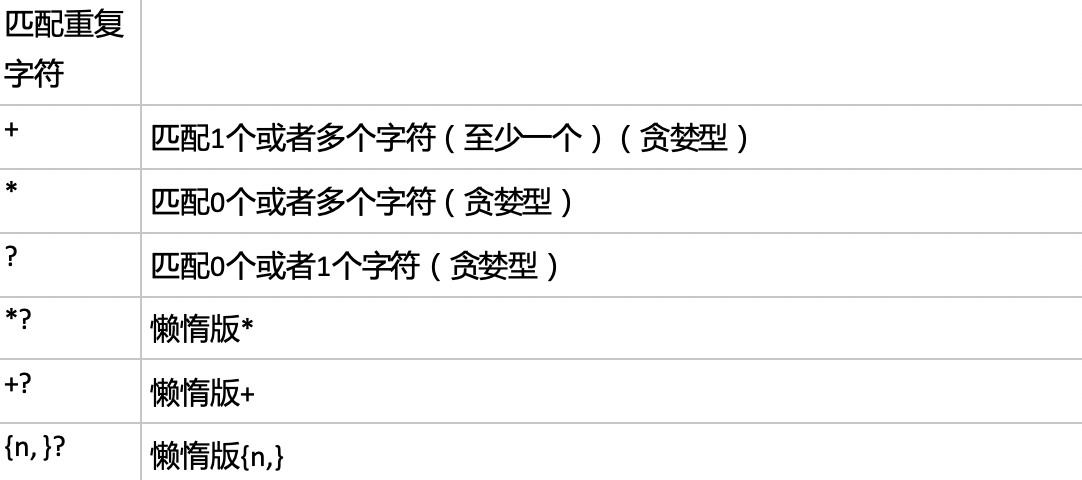

## example 1:匹配0个或者多个字符

In [67]:
text='Hello .ben@forta.com is my email address.'
get_res(r'\w+[\w.]*@[\w.]+\.\w+',text)

findall res: ['ben@forta.com']
search res: <re.Match object; span=(7, 20), match='ben@forta.com'>


In [68]:
text="The URL is http://www.forta.com/, to connect securely use https://www.forta.com/ instead."
get_res(r"https?://[\w./]+",text)

findall res: ['http://www.forta.com/', 'https://www.forta.com/']
search res: <re.Match object; span=(11, 32), match='http://www.forta.com/'>


## example 2:明确数量匹配

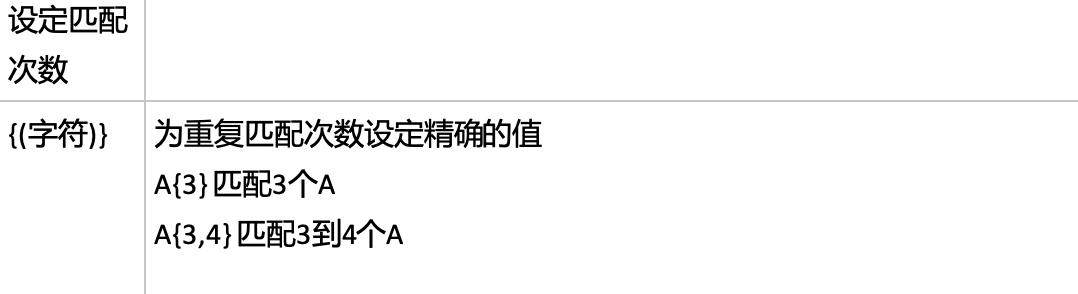

In [69]:
text="<BODY BGCOLOR=”#336633” TEXT=”#FFFFFF” MARGINWIDTH=”0” MARGINHEIGHT=”0” TOPMARGIN=”0” LEFTMARGIN=”0”>"

get_res(r"\d{6}",text)

findall res: ['336633']
search res: <re.Match object; span=(16, 22), match='336633'>


## example 3:范围匹配

In [70]:
text="4/8/03 \
10-6-2004 \
2/2/2 \
01-01-01"

get_res(r"\d{1,2}[-\/]\d{1,2}[-\/]\d{2,4}",text)

findall res: ['4/8/03', '10-6-2004', '01-01-01']
search res: <re.Match object; span=(0, 6), match='4/8/03'>


## example 4:至少多少 次数匹配

In [71]:
text="1001: $496.80 1002: $1290.69 1003: $26.43 1004: $613.42 1005: $7.61 1006: $414.90 1007: $25.00"

get_res(r"\d+: \$\d{3,}\.\d{2}",text)

findall res: ['1001: $496.80', '1002: $1290.69', '1004: $613.42', '1006: $414.90']
search res: <re.Match object; span=(0, 13), match='1001: $496.80'>


# example 5:防止过度匹配

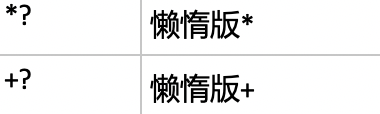

In [72]:
text="This offer is not available to customers living in <B>AK</B> and <B>HI</B>."

get_res(r"<[Bb]>.*</[Bb]>",text)

get_res(r"<[Bb]>.*?</[Bb]>",text)

findall res: ['<B>AK</B> and <B>HI</B>']
search res: <re.Match object; span=(51, 74), match='<B>AK</B> and <B>HI</B>'>
findall res: ['<B>AK</B>', '<B>HI</B>']
search res: <re.Match object; span=(51, 60), match='<B>AK</B>'>


#  5. 位置匹配

## example 1:字符边界

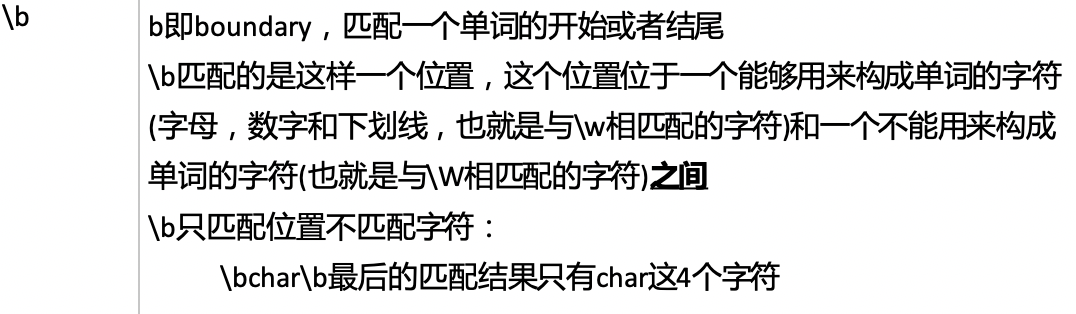

In [73]:
text="The cat scattered his food all over the room."

get_res(r"cat",text)

get_res(r"\bcat\b",text)

findall res: ['cat', 'cat']
search res: <re.Match object; span=(4, 7), match='cat'>
findall res: ['cat']
search res: <re.Match object; span=(4, 7), match='cat'>


## example 2:"\B"边界

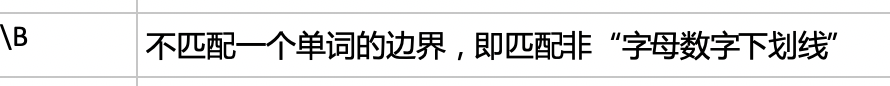

In [74]:
text="Please enter the nine-digit id as it appears on your color - coded pass-key."

get_res(r'\B-\B',text)
print(text[55:63])

get_res(r'\b-\b',text)

findall res: ['-']
search res: <re.Match object; span=(59, 60), match='-'>
lor - co
findall res: ['-', '-']
search res: <re.Match object; span=(21, 22), match='-'>


## example 3:字符串边界

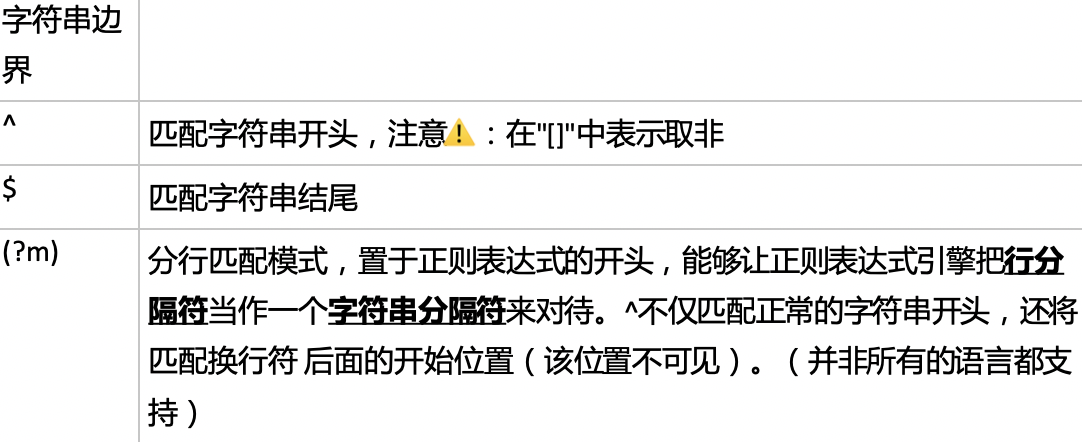

In [75]:
text="<?xml version=”1.0” encoding=”UTF-8” ?> <wsdl:definitions targetNamespace=”http://tips.cf” xmlns:impl=”http://tips.cf” xmlns:intf=”http://tips.cf” xmlns:apachesoap=”http://xml.apache.org/xml-soap”"

get_res(r'^\s*<\?xml.*\?>',text)


findall res: ['<?xml version=”1.0” encoding=”UTF-8” ?>']
search res: <re.Match object; span=(0, 39), match='<?xml version=”1.0” encoding=”UTF-8” ?>'>


# 6. 使用子表达式

## example 1:子表达式

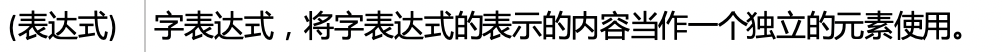

In [76]:
text="Hello, my name is Ben&nbsp;Forta, and I am the author of books on SQL, ColdFusion, WAP,\
Windows&nbsp;&nbsp;2000, and other subjects."

get_res(r'&nbsp;{2,}',text)

get_res(r'(&nbsp;){2,}',text)

findall res: []
search res: None
findall res: ['&nbsp;']
search res: <re.Match object; span=(94, 106), match='&nbsp;&nbsp;'>


# example 2:子表达式

In [77]:
text="Pinging hog.forta.com [12.159.46.200] with [12.159.89.200] 32 bytes of data:"
#findall中含有“()”时，只表示出子表达式特定位置的字符，见下文结果

get_res(r"(\d{1,3}\.){3}\d{1,3}",text)

findall res: ['46.', '89.']
search res: <re.Match object; span=(23, 36), match='12.159.46.200'>


# example 3:子表达式

In [78]:
text='ID: 042 \
SEX: M \
DOB: 1967-08-17 \
Status: Active'

get_res(r"19|20\d{2}",text)

get_res(r"(19|20)\d{2}",text)

findall res: ['19']
search res: <re.Match object; span=(20, 22), match='19'>
findall res: ['19']
search res: <re.Match object; span=(20, 24), match='1967'>


# 7.使用回溯

**回溯引用允许正则表达式模式引用前面的匹配结果。
可以把回溯引用想象成一个变量。**


## example 1:回溯

In [79]:
text='This is a block of of text, several words here are are repeated, and and they should not be.'

get_res(r"[ ]+(\w+)[ ]+\1",text)#\1 就是引用(\w+)的内容，表示第1个子表达式

findall res: ['of', 'are', 'and']
search res: <re.Match object; span=(15, 21), match=' of of'>


## example 2: 回溯

In [80]:
text="<BODY> \
<H1>Welcome to my Homepage</H1> \
Content is divided into two sections:<BR> <H2>ColdFusion</H2> \
Information about Macromedia ColdFusion. <H2>Wireless</H2> \
Information about Bluetooth, 802.11, and more. <H2>This is not valid HTML</H3> \
</BODY>"

get_res(r"<[hH]([1-6])>.*?</[hH]\1>",text)

findall res: ['1', '2', '2']
search res: <re.Match object; span=(7, 38), match='<H1>Welcome to my Homepage</H1>'>


# 8. 前后查找

前后查找（lookaround）对某一位置的前、后内容进行查找。


## example 1:向前查找

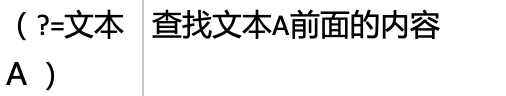

In [81]:
text='http://www.forta.com/\n\
https://mail.forta.com/\n\
ftp://ftp.forta.com/\n'

get_res(r".+(?=:)",text)

findall res: ['http', 'https', 'ftp']
search res: <re.Match object; span=(0, 4), match='http'>


## example 2:向后查找

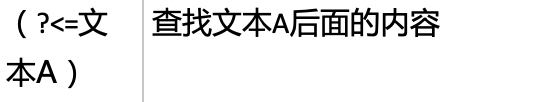

In [82]:
text='ABC01: $23.45\n\
HGG42: $5.31\n\
CFMX1: $899.00 XTC99: $69.96\n\
Total items found: 4'

get_res(r"(?<=\$)[0-9.]+",text)

findall res: ['23.45', '5.31', '899.00', '69.96']
search res: <re.Match object; span=(8, 13), match='23.45'>


## example 3:向前向后查找

In [83]:
text='<HEAD>\n\
<TITLE>Ben Forta’s Homepage</TITLE>\n\
</HEAD>'

get_res(r"(?<=<[tT][iI][tT][lL][eE]>).*(?=</[tT][iI][tT][lL][eE]>)",text)

findall res: ['Ben Forta’s Homepage']
search res: <re.Match object; span=(14, 34), match='Ben Forta’s Homepage'>


## example 4:负向查找

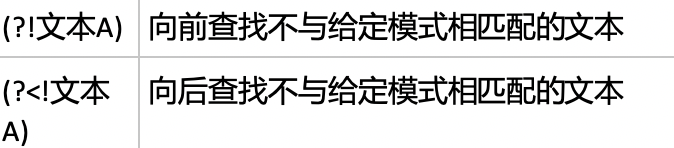

In [84]:
text="I paid $30 for 100 apples, 50 oranges, and 60 pears. I saved $5 on this order."

get_res(r"(?<!\$)\d+",text)

findall res: ['0', '100', '50', '60']
search res: <re.Match object; span=(9, 10), match='0'>


# 9. 嵌入条件

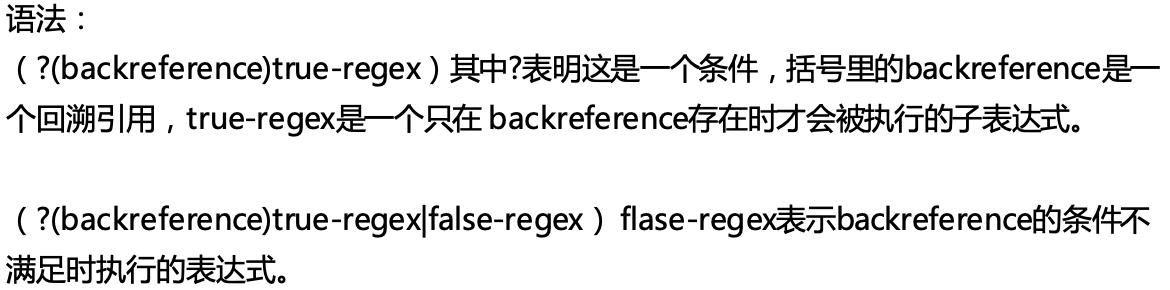

## example 1:（?(backreference)true-regex）

In [85]:
text='<!-- Nav bar -->\n\
<TD>\n\
<A HREF=”/home”><IMG SRC=”/images/home.gif”></A>\n\
<IMG SRC=”/images/spacer.gif”>\n\
<A HREF=”/search”><IMG SRC=”/images/search.gif”></A>\n\
<IMG SRC=”/images/spacer.gif”>\n\
<A HREF=”/help”><IMG SRC=”/images/help.gif”></A> </TD>'

get_res(r"(<[Aa]\s+[^>]+>\s*)?<[Ii][Mm][Gg]\s+[^>]+>(?(1)\s*</[Aa]>)",text)

findall res: ['<A HREF=”/home”>', '', '<A HREF=”/search”>', '', '<A HREF=”/help”>']
search res: <re.Match object; span=(22, 70), match='<A HREF=”/home”><IMG SRC=”/images/home.gif”></A>'>


## example 2:（?(backreference)true-regex|false-regex）


In [86]:
text='123-456-7890\n\
(123)456-7890\n\
(123)-456-7890\n\
(123-456-7890\n\
1234567890\n\
123 456 7890'

get_res(r"(\()?\d{3}(?(1)\)|-)\d{3}-\d{4}",text)

findall res: ['', '(', '']
search res: <re.Match object; span=(0, 12), match='123-456-7890'>
